# Convolutional Neural Network
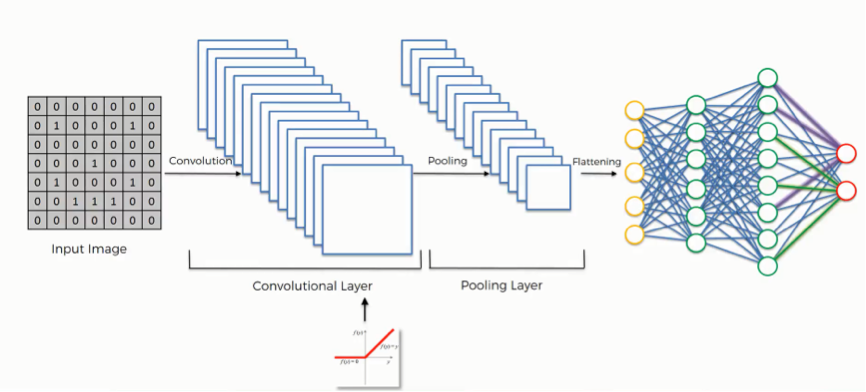

> A Convolutional Neural Network (CNN) is a type of deep learning model specifically designed for processing and analyzing visual data, such as images and videos. It's widely used in computer vision tasks like image classification, object detection, facial recognition, and more. CNNs are inspired by the human visual system, which processes visual information in a hierarchical and localized manner.

## The key components of a CNN are:
1. **Convolutional Layers:** These layers apply a set of learnable filters (also called kernels) to input data. These filters slide across the input data, performing element-wise multiplications and summations, which helps detect various features like edges, textures, and patterns.

2. **Activation Functions:** Activation functions like ReLU (Rectified Linear Unit) are applied after convolution to introduce non-linearity into the network, enabling it to learn more complex relationships in the data.

3. **Pooling Layers:** Pooling layers (typically max pooling) downsample the feature maps generated by convolutional layers. They help reduce the spatial dimensions while retaining the most important information. This aids in reducing computation and controlling overfitting.

4. **Fully Connected Layers:** After a series of convolutional and pooling layers, one or more fully connected (dense) layers are added for making final predictions or classifications based on the extracted features.

The typical architecture of a CNN consists of a stack of these layers, organized in a way that the network learns to detect low-level features in the early layers and progressively combines them to recognize more complex and high-level patterns in the later layers. This hierarchical feature learning is a key reason for the effectiveness of CNNs in tasks like image classification.

CNNs are trained using labeled data, where the network learns to adjust its internal parameters (weights and biases) through backpropagation and optimization algorithms to minimize the difference between its predictions and the actual ground truth labels. Popular CNN architectures include LeNet, AlexNet, VGGNet, GoogLeNet, ResNet, and more, each with its own innovations and improvements.

## Convolutional Layers

>A convolutional layer is a fundamental building block of a Convolutional Neural Network (CNN). It performs convolution operations on the input data, which are typically images or other grid-like data, to extract various features and patterns. These features become increasingly complex as the data passes through deeper layers of the network. Let's break down the key components and operations within a convolutional layer:

1. **Filters (Kernels):** A filter, also known as a kernel, is a small matrix with learnable weights. Filters are slid over the input data in a systematic manner, and at each position, an element-wise multiplication and sum of the filter's weights with the corresponding input values are performed. The result is a single value representing how well the filter matches a specific pattern in the input.

2. **Convolution Operation:** The convolution operation involves sliding the filter over the input data with a certain stride (the step size at which the filter moves). At each position, the filter's values are element-wise multiplied with the input data values that overlap with the filter. The element-wise products are summed up to produce a single value at that position in the output, which forms a feature map.

3. **Strides:** The stride determines how much the filter moves horizontally and vertically after each convolution operation. A larger stride leads to a smaller output size and less computation, while a smaller stride retains more spatial information but increases computational load.

4. **Padding:** Padding involves adding additional rows and columns of zeros around the input data before convolution. This is done to ensure that the output feature map has the same spatial dimensions as the input, as multiple convolution operations can otherwise cause the dimensions to shrink. Padding helps retain information at the borders of the input.

5. **Activation Function:** After the convolution operation, an activation function is typically applied element-wise to the resulting values in the feature map. Common activation functions include ReLU (Rectified Linear Unit), which sets negative values to zero and retains positive values as they are. This introduces non-linearity and helps the network learn more complex relationships.

The output of a convolutional layer is a set of feature maps that represent different extracted features from the input data. These features can range from simple patterns like edges and corners to more complex structures like textures and object parts. By stacking multiple convolutional layers, each with different filters, strides, and activation functions, the network can learn to detect increasingly abstract and high-level features, which are then used by subsequent layers for tasks like image classification or object detection.

In summary, convolutional layers are the heart of CNNs, responsible for extracting meaningful features from input data that enable the network to perform advanced visual recognition tasks.

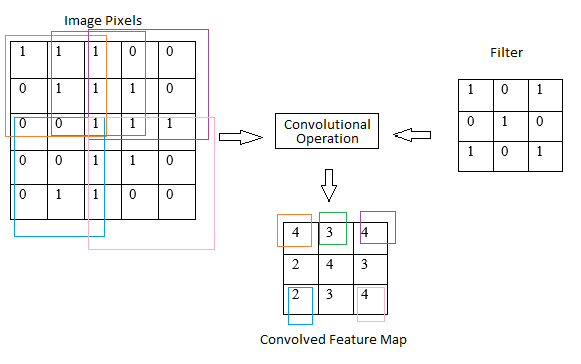

# Implementation

In this notebook we will implement CNN using tensorflow core.
Let's implement convolution layer first.

In [1]:
import tensorflow as tf

2023-08-25 06:43:28.978069: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-25 06:43:29.216979: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-25 06:43:29.219497: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-25 06:43:30.613765: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


##  Zero Padding
Zero padding refers to the practice of adding extra empty values, usually zeros, to the beginning, end, or sides of data,

`tf.pad(
    tensor, paddings, mode='CONSTANT', constant_values=0, name=None
)`


In [2]:
tf.pad([[1,2,3],
        [1,2,3]], ([1,1], [1,1]))

<tf.Tensor: shape=(4, 5), dtype=int32, numpy=
array([[0, 0, 0, 0, 0],
       [0, 1, 2, 3, 0],
       [0, 1, 2, 3, 0],
       [0, 0, 0, 0, 0]], dtype=int32)>

In [3]:
def zero_pad(input_data, padding):
    padding_x = padding[0]
    padding_y = padding[1]
    return tf.pad(input_data, ([padding_x, padding_x], [padding_y, padding_y]))
    

In [4]:
input_data = [[1, 2, 3],
             [4, 5, 6]]

zero_pad(input_data, (1, 1))

<tf.Tensor: shape=(4, 5), dtype=int32, numpy=
array([[0, 0, 0, 0, 0],
       [0, 1, 2, 3, 0],
       [0, 4, 5, 6, 0],
       [0, 0, 0, 0, 0]], dtype=int32)>

In [5]:
zero_pad(input_data, (2, 2))

<tf.Tensor: shape=(6, 7), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 2, 3, 0, 0],
       [0, 0, 4, 5, 6, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=int32)>

## output shape calculation
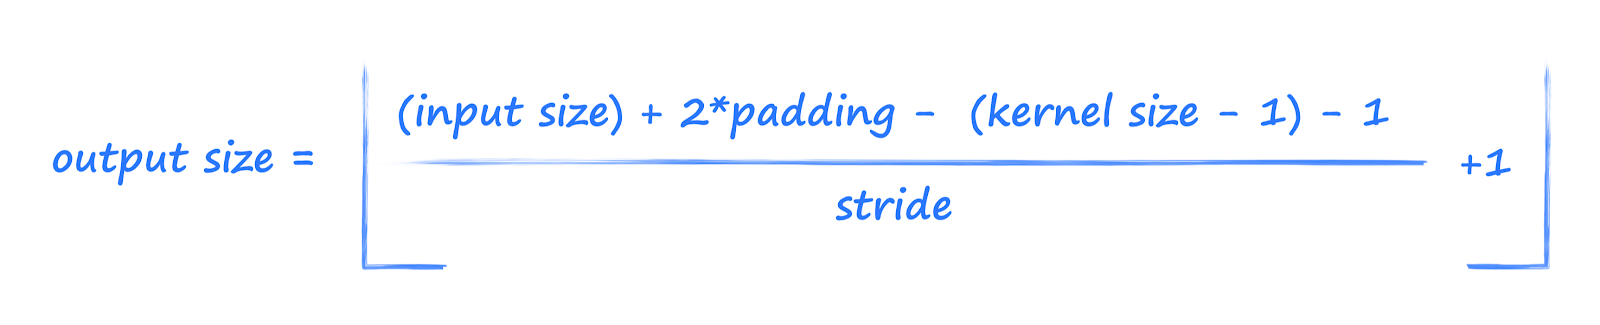

In [21]:
def calc_output_dim(input_dim, kernel_dim, padding, stride):
    if stride[0] < 1 or stride[1] < 1:
        # stride needs to be >= 1
        raise ValueError("stride need to be greater than equals to 1")
    # for 2D
    w = (input_dim[0] + 2 * padding[0] - kernel_dim[0]) // stride[0] + 1
    h = (input_dim[1] + 2 * padding[0] - kernel_dim[1]) // stride[1] + 1
    return (int(w), int(h))

In [22]:
calc_output_dim((20, 20), (3, 3), (0, 0), (1, 1))

(18, 18)

In [27]:
calc_output_dim((19, 19), (3, 3), (0, 0), (2, 2))

(9, 9)

## Convolution single step
Implement single step of convolution, in which you apply the filter to a single position of the input. This will be used to build a convolution unit, which
- Takes input volume
- Apply a filter at every position of the input
- Output another volume

In [45]:
tf.math.multiply([1,2,3], [1,2,3])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 4, 9], dtype=int32)>

In [60]:
tf.math.reduce_sum([[1,2,3], [1,2,3]])

<tf.Tensor: shape=(), dtype=int32, numpy=12>

In [62]:
tf.squeeze([[[1]]])

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [67]:
def conv_single_step(input_slice, W, b):
    """
    input_slice shape: (k, k, n_c_prev)
    W shape: (k, k, n_c_prev)
    b shape: (1, 1, 1)
    """
    
    # element wise multiplication between input_slice and W
    ele_mul = tf.math.multiply(input_slice, W)
    
    # sum over all entries
    Z = tf.math.reduce_sum(ele_mul)
    # add bias
    b = tf.squeeze(b)
    Z += b
    return Z

In [68]:
input_slice = tf.ones((5, 5, 3))
W = tf.ones((5, 5, 3))
b = tf.ones((1, 1, 1))

conv_single_step(input_slice, W, b)

<tf.Tensor: shape=(), dtype=float32, numpy=76.0>

## Convolution forward pass